# **Solar ultraviolet spectroscopy** #

This tutorial includes information on ultraviolet spectroscopic observations of solar flares and provides guidance on how to analyze flare data using Python programming.

We will be using ultravoilet spectroscopic observation of a solar flare from the Extreme Ultraviolet Variability Experiment (EVE) instrument on board the Solar Dynamics Observatory (SDO) observatory. Since 2010, EVE has been observing the Sun and produce a spectrum in the wavelength range of 0.1 to 105 nm. It provides data with a time resolution of 10 seconds in "Sun as a star" mode and does not offer image resolution.

The EVE instrument employs two grating spectrographs: MEGS-A for short wavelengths (5-37 nm) and MEGS-B for longer wavelengths (35-105 nm). Each spectrograph images the wavelength-dispersed whole solar disk onto a CCD.


### **EVE instrument:** ### 
link - https://lasp.colorado.edu/instruments/eve/ \
link - https://lasp.colorado.edu/home/eve/ 


### **Level 2 Science Products** ###

The EVE Level 2 products are stored in the scientific format called FITS as binary tables.

Two types of EVE level 2 products are routinely created: Spectra (EVS) and Lines (EVL).

The EVEL level 2 line files contain 6 header data units, containing data and corresponding information pertaining to 30 extracted solar emission lines. Each file contains one hour's worth of observations with each observation being reported at the instruments nominal integration time of 10 seconds, except the 4 Hz ESP diode values that are averaged to 10 seconds to correspond with other EVE instrument observations.

### **Naming Convention** ###

Level 2 products follow this naming convention: \
EV?_L2_YYYYDDD_HH_vvv_rr.fit where: \
EV designates this as an EVE product \
? is either S (spectrum) or L (lines/bands) \
L2 designates this as a level 2 product YYYY is the year \
DDD is the day of year (001 - 366) \
HH is the UT hour of day (00 - 23) \
vvv is the version number (007) \
rr is the revision number (01 - 99) 
        
        
### **Science data access** ### 
link: https://lasp.colorado.edu/eve/data_access/index.html


### **EVE level 2 data download** ###
link: https://lasp.colorado.edu/eve/data_access/eve_data/misc/eve_calendars/calendar_level2_2018.html

### **EVE documentation** ###
link: https://lasp.colorado.edu/eve/data_access/eve-documentation/index.html  

### **Full documentation for the flare catalog** ###
link: https://lasp.colorado.edu/eve/data_access/eve-flare-catalog/index.html \
link: https://lasp.colorado.edu/eve/data_access/eve_data/Flare_Catalog/eve_flare_catalog.pdf 

In [5]:
### Importing relevant modules

import numpy as np

from astropy.io import fits
import astropy.units as u

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator

from scipy import stats
import scipy as scipy
from scipy import optimize

# you need to install lmfit package - conda install -c conda-forge lmfit
#from lmfit import Model, Parameters
import matplotlib.ticker as tck

# set the font globally
# plt.rcParams.update({'font.family':'sans-serif'})

# set the font name for a font family
# plt.rcParams.update({'font.sans-serif':'Helvetica'})

from datetime import timedelta
from datetime import datetime


In [7]:
# locate the file path where EVE data is available
# open EVE Line FITS file
# summarizes the content of the opened FITS file

flare_file1 = fits.open('/Users/sargammulay/Desktop/python/EVE_puthon_tutorial/EVL_L2_2013134_01_007_01.fit.gz')

flare_file1

# HDUList - https://docs.astropy.org/en/stable/io/fits/api/hdulists.html#astropy.io.fits.HDUList

# The open function returns an object called an HDUList which is a list-like collection of HDU objects. 
# An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header 
# and (typically) a data array or table.

# After the above open call, hdul[0] is the primary HDU, hdul[1] is the first extension HDU, etc. 
# (if there are any extensions), and so on. It should be noted that astropy uses zero-based indexing when 
# referring to HDUs and header cards, though the FITS standard 


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x168d79460>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x168d7b950>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x168d74890>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x168d7d0a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x168d7df70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x168d7cf80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x168d6fda0>]

In [8]:
# Index of HDU for which info is to be returned.

flare_file1.index

<function HDUList.index(value, start=0, stop=9223372036854775807, /)>

In [9]:
# Returns a dictionary detailing information about the locations of the indexed HDU within any associated file.
# read the header of the file
flare_file1.info()

Filename: /Users/sargammulay/Desktop/python/EVE_puthon_tutorial/EVL_L2_2013134_01_007_01.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  LinesMeta     1 BinTableHDU     45   39R x 7C   [E, E, E, E, 8A, 5A, 13A]   
  2  BandsMeta     1 BinTableHDU     31   20R x 4C   [13A, 4A, E, E]   
  3  DiodeMeta     1 BinTableHDU     28   6R x 3C   [25A, 6A, 5A]   
  4  QuadMeta      1 BinTableHDU     26   4R x 2C   [2A, 3A]   
  5  LinesData     1 BinTableHDU    114   360R x 19C   [D, J, D, B, B, 39E, 39E, 39E, 20E, 20E, 20E, 6E, 6E, 6E, 6E, 4E, 4E, 4E, 4E]   
  6  LinesDataUnits    1 BinTableHDU     58   1R x 19C   [87A, 62A, 65A, 49A, 81A, 171A, 18A, 17A, 242A, 18A, 17A, 59A, 72A, 18A, 66A, 135A, 72A, 49A, 75A]   


## Level 2 Lines/Bands Products ##

The EVE level 2 line files contain 6 header data units, containing data and corresponding
information pertaining to 30 extracted solar emission lines. Each file contains one hour’s
worth of observations with each observation being reported at the instruments nominal
integration time of 10 seconds, except the 4 Hz ESP diode values that are averaged to 10
seconds to correspond with other EVE instrument observations.

In [11]:
# check the header of the file
flare_file1[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.11                  
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

## LinesMeta: ##

The LinesMeta data unit contains information about lines derived from the EVE
level 2 spectrum. It contains wavelength information describing the line, line
temperature, the line name, line type, and other lines included within the
wavelength band of the line as described in the following table.

| Column Name | Type | Description | 
| :- | -: | :-: |
| wave_center | Float | Center wavelength of line |
| wave_min    | Float | Minimum wavelength of line |
| wave_max    | Float | Maximum wavelength of line |
| LogT        | Float | Log (base 10) temperature of line (K) |
| Name        | String | Line name example (Fe XVIII) |
| Type        | String | Type of line example (F) |
| Blends      | String | Other lines included in this line |


In [12]:
flare_file1[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   42 /Number of bytes per row                         
NAXIS2  =                   39 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    7 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'LinesMeta'                                                           
TUNIT1  = 'nm'              

In [13]:
print(flare_file1[1].data)

[(  9.3926,   9.33,   9.43, 6.81, 'Fe XVIII', 'F', '')
 ( 13.124 ,  13.04,  13.17, 5.57, 'Fe VIII', 'K', 'Fe VIII')
 ( 13.285 ,  13.23,  13.32, 6.97, 'Fe XX', 'N', 'Fe XXIII')
 ( 17.107 ,  17.02,  17.24, 5.81, 'Fe IX', 'Ar', '')
 ( 17.7243,  17.63,  17.83, 5.99, 'Fe X', 'Cl', 'Fe VII')
 ( 18.0407,  17.96,  18.15, 6.07, 'Fe XI', 'S', 'Fe X, Fe VII')
 ( 19.512 ,  19.43,  19.61, 6.13, 'Fe XII', 'P', '')
 ( 20.2044,  20.14,  20.32, 6.19, 'Fe XIII', 'Si', 'Fe XI, Fe XII')
 ( 21.1331,  21.07,  21.2 , 6.27, 'Fe XIV', 'Al', 'Fe XII')
 ( 25.6317,  25.55,  25.68, 4.75, 'He II', 'H', '')
 ( 28.415 ,  28.3 ,  28.5 , 6.3 , 'Fe XV', 'Mg', '')
 ( 30.3783,  30.25,  30.5 , 4.7 , 'He II', 'H', '')
 ( 33.541 ,  33.49,  33.61, 6.43, 'Fe XVI', 'Na', '')
 ( 36.0758,  36.03,  36.15, 6.43, 'Fe XVI', 'Na', '')
 ( 36.8076,  36.75,  36.87, 5.99, 'Mg IX', 'Be', 'Fe VIII-XIV')
 ( 44.57  ,  44.53,  44.65, 6.44, 'S XIV', '', '')
 ( 46.5221,  46.47,  46.61, 5.71, 'Ne VII', 'Be', '')
 ( 49.9406,  49.89,  50.01, 6.29, 

In [14]:
#print(flare_file1[1].data[0])

print(flare_file1[1].data[0][4:5])

('Fe XVIII')


## BandMeta data ##

The BandsMeta data unit describes the extracted bands from the EVE spectrum that
correspond to the 7 AIA spectral bands, two GOES - 14 bands, 4 extracted MEGS
spectral bands corresponding to the ESP diodes, two very broad bands used for
creating the Q EUV proxy, two MEGS - A broadbands representing each slit, and 3 MEGS -
B bands. The BandsMeta data unit is described in the following table.

| Column Name | Type | Description | 
| :- | -: | :-: |
| Name | String | (AIA_304) |
| Type | String | SDO instrument example (AIA) |
| Low_Wavelength_nm | Float | 23.2650 |
| High_Wavelength_nm | Float | 37.4450 |
                

In [15]:
print(flare_file1[2].header)

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           BITPIX  =                    8 /Required value                                  NAXIS   =                    2 /Required value                                  NAXIS1  =                   25 /Number of bytes per row                         NAXIS2  =                   20 /Number of rows                                  PCOUNT  =                    0 /Normally 0 (no varying arrays)                  GCOUNT  =                    1 /Required value                                  TFIELDS =                    4 /Number of columns in table                      COMMENT                                                                         COMMENT  *** End of mandatory fields ***                                        COMMENT                                                                         EXTNAME = 'BandsMeta'                                                           COMMENT                                 

In [16]:
print(flare_file1[2].data)

[('AIA_A94', 'AIA',  9.275,   9.515) ('AIA_A131', 'AIA', 12.595,  13.475)
 ('AIA_A171', 'AIA', 15.205,  18.965) ('AIA_A193', 'AIA', 17.715,  20.955)
 ('AIA_A211', 'AIA', 19.355,  22.755) ('AIA_A304', 'AIA', 23.265,  37.445)
 ('AIA_A335', 'AIA', 10.325,  35.865)
 ('GOES-14 EUV-A', 'GOES',  5.005,  14.995)
 ('GOES-14 EUV-B', 'GOES', 25.005,  33.995)
 ('MA171', 'ESP', 14.505,  22.195) ('MA257', 'ESP', 22.005,  29.195)
 ('MA304', 'ESP', 26.715,  33.785) ('MA366', 'ESP', 33.005,  38.995)
 ('E7-37', 'MEGS',  7.   ,  37.   ) ('E37-45', 'MEGS', 37.   ,  45.   )
 ('MEGS-A1', 'MEGS',  5.8  ,  17.24 ) ('MEGS-A2', 'MEGS', 17.24 ,  33.34 )
 ('MEGS-B short', 'MEGS', 33.34 ,  61.   )
 ('MEGS-B both', 'MEGS', 61.   ,  79.1  )
 ('MEGS-B long', 'MEGS', 79.1  , 107.   )]


## DiodeMeta data ## 

The DiodeMeta data unit contains information about spectral bands derived from EVE
level 2 spectra that corresponds to measurements made by EVE diodes from ESP and
MEGS P. The diode measurements (ESP and MEGS - P) are averaged down to the 10 -
second spectrum cadence from the 4 Hz measurements to create a more convenient
way to compare the data to other measurements. The DiodeMeta data unit is described
in the following table.

| Column Name | Type | Description | 
| :- | -: | :-: |
| Name | String | Name of band example (171) |
| Type | String | SDO instrument example (ESP) |


In [17]:
print(flare_file1[3].header)

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           BITPIX  =                    8 /Required value                                  NAXIS   =                    2 /Required value                                  NAXIS1  =                   36 /Number of bytes per row                         NAXIS2  =                    6 /Number of rows                                  PCOUNT  =                    0 /Normally 0 (no varying arrays)                  GCOUNT  =                    1 /Required value                                  TFIELDS =                    3 /Number of columns in table                      COMMENT                                                                         COMMENT  *** End of mandatory fields ***                                        COMMENT                                                                         EXTNAME = 'DiodeMeta'                                                           COMMENT                                 

In [18]:
print(flare_file1[3].data)

[('Quad Diode (0.1-7.0nm)', 'ESP', 'W/m^2')
 ('Channel 8 (16.64-21.5nm)', 'ESP', 'W/m^2')
 ('Channel 2 (22.28-28.78nm)', 'ESP', 'W/m^2')
 ('Channel 9 (27.16-33.8nm)', 'ESP', 'W/m^2')
 ('Channel 1 (33.3-40.04nm)', 'ESP', 'W/m^2')
 ('Lyman-alpha (121-122nm)', 'MEGS-P', 'W/m^2')]


## Quad diode ##

The ESP central quad diode contains information about the center of brightness for
the 0.1 - 7 nm bandpass. These are normalized to provide a relative measure of the
distribution of irradiance. During flare periods, the difference of flare and pre - flare
measurements indicate the flare position.

| Column Name | Type | Description | 
| :- | -: | :-: |
| Name | String | Name of band example (Q0) |
| Type | String | SDO instrument example (ESP) |


In [19]:
print(flare_file1[4].header)

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           BITPIX  =                    8 /Required value                                  NAXIS   =                    2 /Required value                                  NAXIS1  =                    5 /Number of bytes per row                         NAXIS2  =                    4 /Number of rows                                  PCOUNT  =                    0 /Normally 0 (no varying arrays)                  GCOUNT  =                    1 /Required value                                  TFIELDS =                    2 /Number of columns in table                      COMMENT                                                                         COMMENT  *** End of mandatory fields ***                                        COMMENT                                                                         EXTNAME = 'QuadMeta'                                                            COMMENT                                 

In [20]:
print(flare_file1[4].data)

[('Q0', 'ESP') ('Q1', 'ESP') ('Q2', 'ESP') ('Q3', 'ESP')]


## LinesDataUnits ##

The LinesDataUnits data unit contains unit information for corresponding entries in
the LinesData data unit. The contents of the data unit are described in the table
below.

| Column Name | Type | Description | 
| :- | -: | :-: |
| TAI | String | seconds // International Atomic Time seconds since Jan 1, 1958 at center of integration |
| YYYYDOY | String | NA // 4 - digit year and 3 - digit day of year designator with Jan 1=001 |
| SOD | String | seconds // seconds of the UT day at the center of the integration |
| FLAGS | String | NA // 0=good, other values indicate data may be suspect |
| SC_FLAGS | String | NA // 0=good, other value indicate spacecraft events like eclipses, lunar |
| Line_Irradiance | String | W m^ - 2 // Power per unit area at 1 - AU over the integrated line with no background subtraction |
| Line_Precision | String | NA // relative precision |
| Line_Accuracy | String | NA // relative accuracy |
| Band_Irradiance | String | Mixed: W m^ - 2 or avg counts AIApixel^ - 1 second^ - 1 // Power per unit area at 1 - AU over the integrated band |
| Band_Precision | String | NA // relative precision |
| Band_Accuracy | String | NA // relative accuracy |
| Diode_Irradiance | String | W m^ - 2 // Power per unit area at 1 - AU measured by the diode |
| Diode_Stdev | String | NA // relative one - sigma spread of 4 hz integrations over the 10 second window |
| Diode_Precision | String | NA // relative precision |
| Diode_Accuracy | String | Relative accuracy of diode measurements |
| Quad_Fraction | String | NA // fraction of the 0.1 - 7 nm irradiance in each of the quadrant diodes with the sum=1., useful for finding location of center of irradiance |
| Quad_Stdev | String | NA // relative one - sigma spread of 4 Hz integrations over the 10 second window |
| Quad_Precision | String | Relative precision of quadrant diode measurements |
| Quad_Accuracy | String | Relative accuracy of quadrant diode measurements |


In [21]:
print(flare_file1[5].header)

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           BITPIX  =                    8 /Required value                                  NAXIS   =                    2 /Required value                                  NAXIS1  =                  890 /Number of bytes per row                         NAXIS2  =                  360 /Number of rows                                  PCOUNT  =                    0 /Normally 0 (no varying arrays)                  GCOUNT  =                    1 /Required value                                  TFIELDS =                   19 /Number of columns in table                      COMMENT                                                                         COMMENT  *** End of mandatory fields ***                                        COMMENT                                                                         ORIGIN  = '            SDO/EVE SPOC' // LASP, University of Colorado, Boulder   DATE    = '2021-08-18T15:06:07.000Z' // 

In [22]:
print(flare_file1[5].header[80])

W m^-2


In [23]:
len(flare_file1[5].data)

360

In [24]:
type(flare_file1[5].data)

astropy.io.fits.fitsrec.FITS_rec

## LinesData ##
The LinesData data unit contains the actual science measurements for the
observation period for lines, bands and diodes. The diode measurements are
averaged to 10 seconds to provide measurements at the same cadence as the line
and band measurements.


| Column Name | Type | Description | 
| :- | -: | :-: |
| TAI | Double | International Atomic Time of center of observation |
| YYYYDOY | Long | Year and day of year of observation |
| SOD | Double | Seconds of day of the center of observation |
| FLAGS | Byte | EVE specific flags |
| SC_FLAGS | Byte | SDO specific flags |
| Line_Irradiance | String | An array of irradiance values. One value per line |
| Line_Precision | String | An array of precision values. One value per line |
| Line_Accuracy | String | An array of accuracy values. One value per line |
| Band_Irradiance | String | An array of irradiance values. One value per band |
| Band_Precision | String | An array of precision values. One value per band |
| Band_Accuracy | String | An array of accuracy values. One value per band |
| Diode_Irradiance | String | An array of irradiance values. One value per diode |
| Diode_Stdev | String | An array of standard deviation values. One value per diode |
| Diode_Precision | String | An array of precision values. One value per diode |
| Diode_Accuracy | String | An array of accuracy values. One value per diode |
| Quad_Fraction | String | The fractional amount of the diode per total of all quad diodes |
| Quad_Stdev | String | The standard deviation of the observations for the diode |
| Quad_Precision | String | The precision of the observations for the diode |
| Quad_Accuracy | String | The accuracy of the observations for the diode |

## Flags ##

There are two sets of flags included. One is EVE specific flags, and the other is Spacecraft flags. Generally, any flags being set mean some data are missing or possibly suspect. The following tables describe the values for each bit in the flag. Values in the FLAGS field are the bitwise OR of these values.

## EVE specific flags ##

Values in the FLAGS field are the bitwise OR of these values.

| Column Name | Type | Description | 
| :- | -: | :-: |
| Bit 1 (Value 1) | MEGS - A data is missing |
| Bit 2 (Value 2) | MEGS - B data is missing |
| Bit 3 (Value 4) | ESP data is missing |
| Bit 4 (Value 8) | MEGS - P data is missing |
| Bit 5 (Value 16) | Possibile clock adjustment in MEGS - A |
| Bit 6 (Value 32) | Possibile clock adjustment in MEGS - B |
| Bit 7 (Value 64) | Possibile clock adjustment in ESP |
| Bit 8 (Value 128) | Possibile clock adjustment in MEGS - P |


## Spacecraft flags ##

Values in the SC_FLAGS field are the bitwise OR of these values.

More information on flasgs is available at \
link: https://lasp.colorado.edu/eve/data_access/eve_data/products/level2/EVE_L2_V8_README.pdf

In [25]:
print(flare_file1[6].header)

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           BITPIX  =                    8 /Required value                                  NAXIS   =                    2 /Required value                                  NAXIS1  =                 1373 /Number of bytes per row                         NAXIS2  =                    1 /Number of rows                                  PCOUNT  =                    0 /Normally 0 (no varying arrays)                  GCOUNT  =                    1 /Required value                                  TFIELDS =                   19 /Number of columns in table                      COMMENT                                                                         COMMENT  *** End of mandatory fields ***                                        COMMENT                                                                         EXTNAME = 'LinesDataUnits'                                                      COMMENT                                 

In [26]:
print(flare_file1[6].data)

[('seconds // International Atomic Time seconds since Jan 1, 1958 at center of integration', '4-digit year and 3-digit day of year designator with Jan 1=001', 'seconds // seconds of the UT day at the center of the integration', '0=good, other values indicate data may be suspect', '0=good, other value indicate spacecraft events like eclipses, lunar transits, etc', 'W m^-2 // Power per unit area at 1-AU over the integrated line with no background subtraction, MEGS-A provides the spectrum shorter than 37 nm and MEGS-B longer than 37 nm', 'Relative precision', 'Relative accuracy', 'Mixed: W m^-2 or avg counts AIApixel^-1 second^-1 // Power per unit area at 1-AU over the integrated band with MEGS-A providing the spectrum shorter than 37 nm and MEGS-B longer than 37 nm, note that AIA bands are counts per AIA pixel at 1-AU', 'Relative precision', 'Relative accuracy', 'W m^-2 // Power per unit area at 1-AU measured by the diode', 'Relative one-sigma spread of 4 hz integrations over the 10 seco

In [27]:
meta = flare_file1[5].data
#meta

In [28]:
line_data = meta.field(8)
line_data.shape

(360, 20)

In [29]:
# This is 0th line with 1 hour evolution
len(line_data[:,0])

360

In [30]:
# this is SOD from header 5
obs_time = meta.field(2)
len(obs_time)
#obs_time/3600.0


360

In [31]:
# get the name of the spectral line to be plotted
line_name = flare_file1[1].data[0]
#line_name = flare_file1[1].data[0][4:5]
line_name


(np.float32(9.3926), np.float32(9.33), np.float32(9.43), np.float32(6.81), 'Fe XVIII', 'F', '')

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
/var/folders/g9/w6z321fx25s_jyvjvcjz53480000gn/T/ipykernel_18430/239570090.py:7: SyntaxWarning: invalid escape sequence '\A'
  plt.title('14-May-2013 X3.2: Fe XVIII 93.92 $\AA$')


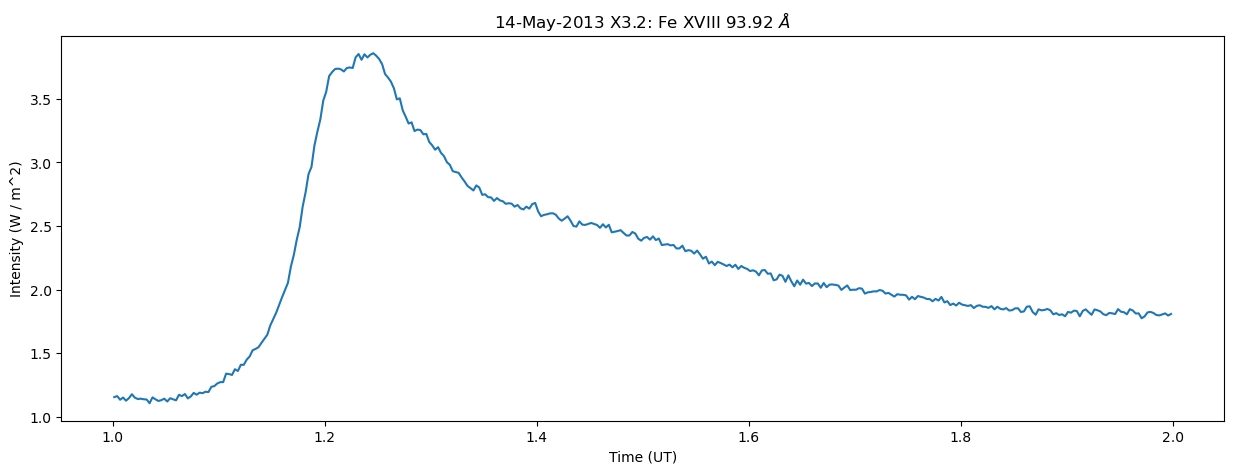

In [32]:
# change the size of the plot
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(obs_time/3600.0, line_data[:,0])
plt.xlabel('Time (UT)')
plt.ylabel('Intensity (W / m^2)')
plt.title('14-May-2013 X3.2: Fe XVIII 93.92 $\AA$')
plt.show()